<a href="https://colab.research.google.com/github/LikhanBiswas/Minsk/blob/main/Mobilenet_for_25k_image_with_15_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/real vs fake/train'
valid_path = '/content/drive/MyDrive/real vs fake/test'

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobile =MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in mobile.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/real vs fake/train/*')

In [ ]:
folders

['/content/drive/MyDrive/real vs fake/train/real',
 '/content/drive/MyDrive/real vs fake/train/fake']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mobile.output)

In [ ]:
len(folders)

2

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobile.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/train',
                                                 target_size = (224, 224),
                                                 batch_size = 100,
                                                 class_mode = 'categorical')

Found 15024 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/test',
                                            target_size = (224, 224),
                                            batch_size = 100,
                                            class_mode = 'categorical')

Found 10000 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
151/151 [==============================] - 7760s 51s/step - loss: 0.1365 - accuracy: 0.9876 - val_loss: 5.7185e-04 - val_accuracy: 0.9999
Epoch 2/20
151/151 [==============================] - 198s 1s/step - loss: 2.7867e-04 - accuracy: 0.9999 - val_loss: 7.5798e-04 - val_accuracy: 0.9999
Epoch 3/20
151/151 [==============================] - 197s 1s/step - loss: 4.7656e-04 - accuracy: 0.9998 - val_loss: 0.0024 - val_accuracy: 0.9997
Epoch 4/20
151/151 [==============================] - 197s 1s/step - loss: 2.3911e-05 - accuracy: 1.0000 - val_loss: 3.9372e-04 - val_accuracy: 0.9999
Epoch 5/20
151/151 [==============================] - 197s 1s/step - loss: 2.0947e-09 - accuracy: 1.0000 - val_loss: 3.9348e-04 - val_accuracy: 0.9999
Epoch 6/20
151/151 [==============================] - 197s 1s/step - loss: 1.9759e-07 - accuracy: 1.0000 - val_loss: 3.9943e-04 - val_accuracy: 0.9999
Epoch 7/20
151/151 [==============================] - 196s 1s/step - loss: 3.5467e-09 - accuracy: 1.

In [ ]:
import matplotlib.pyplot as plt

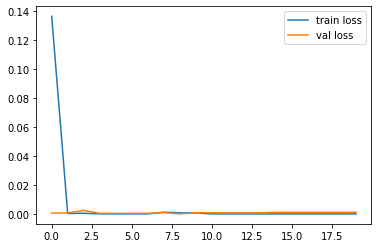

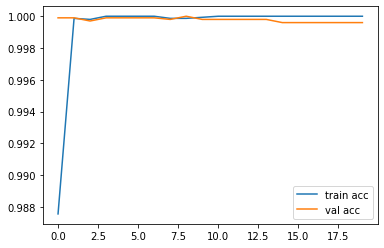

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')